# Optimizacion Industrial con Computacion Evolutiva - Tarea académica

<b>Grupo 1</b><br/>

Miguel Vega (miguel.vegag@pucp.pe)<br/>
Carlos Raymundo (carlos.raymundo@pucp.pe)<br/>
Andrés Valverede (andres.valverdesoriano@gmail.com)<br/><br/>
<b>Profesor</b><br/>
Dr. Edwin Villanueva (ervillanueva@pucp.edu.pe)


# Descripción del problema

<b>Problema 1: Usando computación evolutiva para encontrar localizaciones optimas de una cadena de supermercados</b>

Una conocida cadena de supermercados desea ingresar al mercado limeño. Usted, como experto en IA, ha sido contratado para proponer donde deben ser localizados los supermercados. Para ello, se le está proporcionando un mapa de la ciudad con 60 locales candidatos donde la cadena de supermercados podría localizar sus supermercados. Dicho mapa puede encontrarlo en:
https://drive.google.com/open?id=1w7n77ByWK6TrX74lOBTwID719LRj_UQz&usp=sharing
La cadena tiene presupuesto para instalar 10 supermercados. Se le está proporcionando también una tabla con las coordenadas de las localizaciones candidatas y la población estimada que hay en 500 metros a la redonda. Su objetivo es escoger los supermercados de manera que se maximice la suma de la población que vive a 500m alrededor de los supermercados y la suma de las distancias entre los supermercados escogidos.

Para resolver dicho problema usted debe implementar:
1) Un algoritmo genético mono-objetivo. Cada individuo debe representar una colección de 10 localizaciones. Se sugiere que el cromosoma de un individuo sea un string de 60 bits, cada bit representando si una localización esta seleccionado o no. Para evaluar un individuo se puede usar como función fitness la suma de distancias entre todos los posibles pares de localizaciones escogidas en el individuo (45 pares distintos) más la suma de las poblaciones alrededor de cada supermercado escogido. Implemente operadores de cruzamiento, mutación y selección adecuados para garantizar que los individuos resultantes sean válidos (representen colecciones de 10 localizaciones). Experimente varias veces el algoritmo implementado con una población de 100 individuos y 500 generaciones (se sugiere ejecutar 10 veces) y registre en una tabla los mejores individuos de cada ejecución, sus fitness y los componentes del fitness desagregados (suma de distancias y suma de población).

2) Un algoritmo genético multiobjetivo (NSGA-II). La representación de los cromosomas seria la misma que el caso mono-objetivo. Los objetivos serian: a) suma de distancias entre todos los posibles pares de localizaciones escogidas en el individuo; y b) suma de las poblaciones alrededor de cada supermercado escogido en el individuo. Los operadores de cruzamiento, mutación pueden ser los mismos del caso mono-objetivo. Experimente varias veces el algoritmo implementado con una población de 100 individuos y 500 generaciones (se sugiere ejecutar 10 veces). En cada ejecución registre los individuos de la frontera de Pareto final, así como los valores de las funciones objetivos de dichos individuo. Realice Plots de las fronteras de Pareto encontradas, ubicando en dichos plots los puntos de los mejores individuos encontrados con el algoritmo mono-objetivo.

# Librerías a utilizar

In [ ]:
import sys
import time
import math
import numpy as np
import pandas as pd
import random
from copy import deepcopy
import matplotlib.pyplot as plt
import plotly.express as px

# Definición de Item
Un objeto de clase Item almacena los datos de una localización

In [ ]:
class Item(object):
    def __init__(self, id, desc, latitud, longitud, pob500m):
        self.id  = id # identificaor de la localización
        self.desc = desc # dirección de la localización
        self.latitud = latitud # latitud de la localización
        self.longitud = longitud # longitud de la localización
        self.pob500m = pob500m # población 500m a la redonda

# Definición de individuo y operadores de mutación
Describe el Individuo del algoritmo genético y sus operadores

Se define el individuo según las especificaciones del problema. A continuación, se describe cada elemento:
* Cromosoma: Lista numérica cuyos elementos representan cada uno a una posible localización
* Gen: Elemento de la lista que representa a una localización
* Alelo: Posibles valores que peude tomar un Gen. Indica si se elige o no la localidad (0 = No elegida, 1 = Elegida)

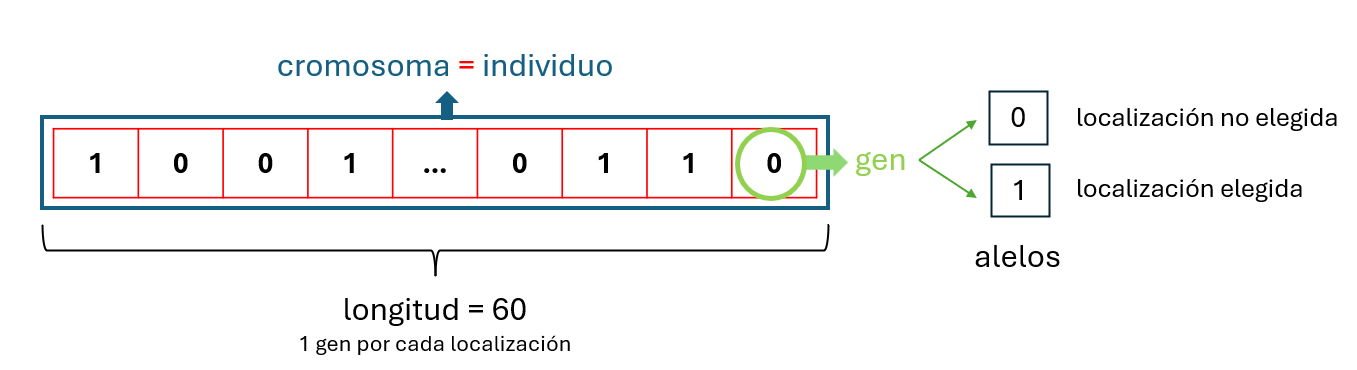

Se utilizarán los cruzamientos onepoint y uniforme. En caso un individuo hijo tenga más genes activados (con valor 1) de lo permitido, intercambiará genes activados con el otro hijo hasta que se logre una equidad

<b>Cruzamiento One-Point:</b>

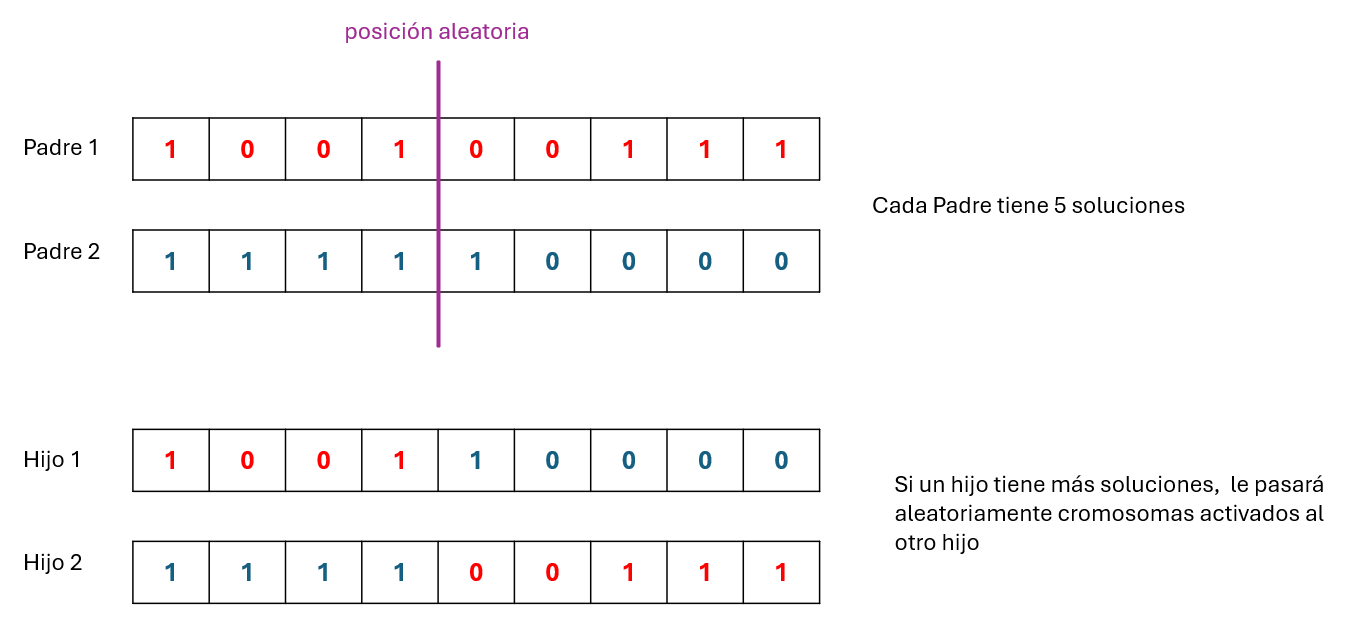

<b>Resolución de soluciones inválidas:</b>
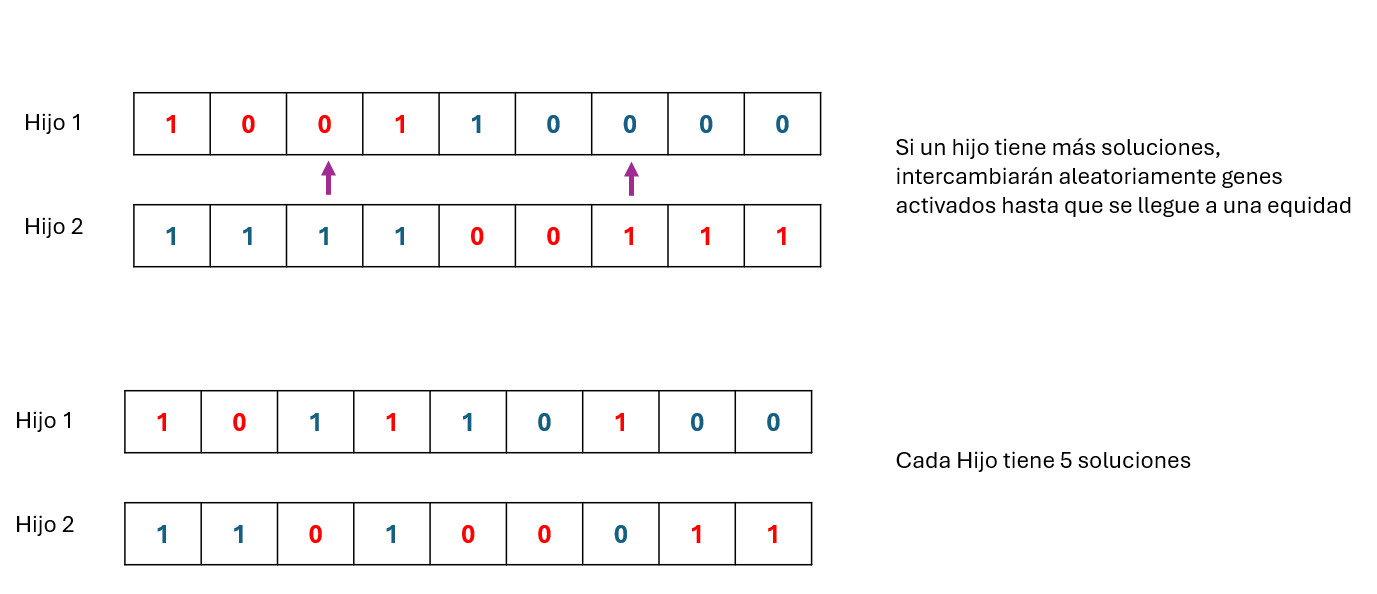

<b>Cruzamiento Uniforme:</b>
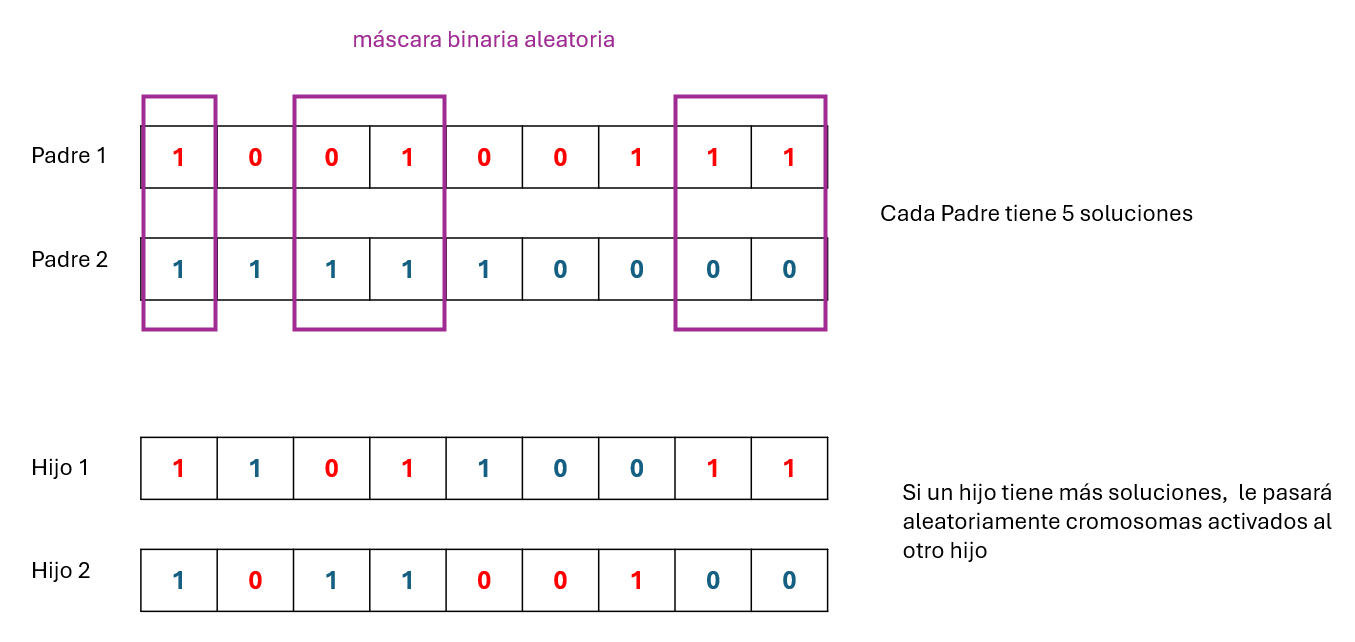

<b>Resolución de soluciones inválidas:</b>
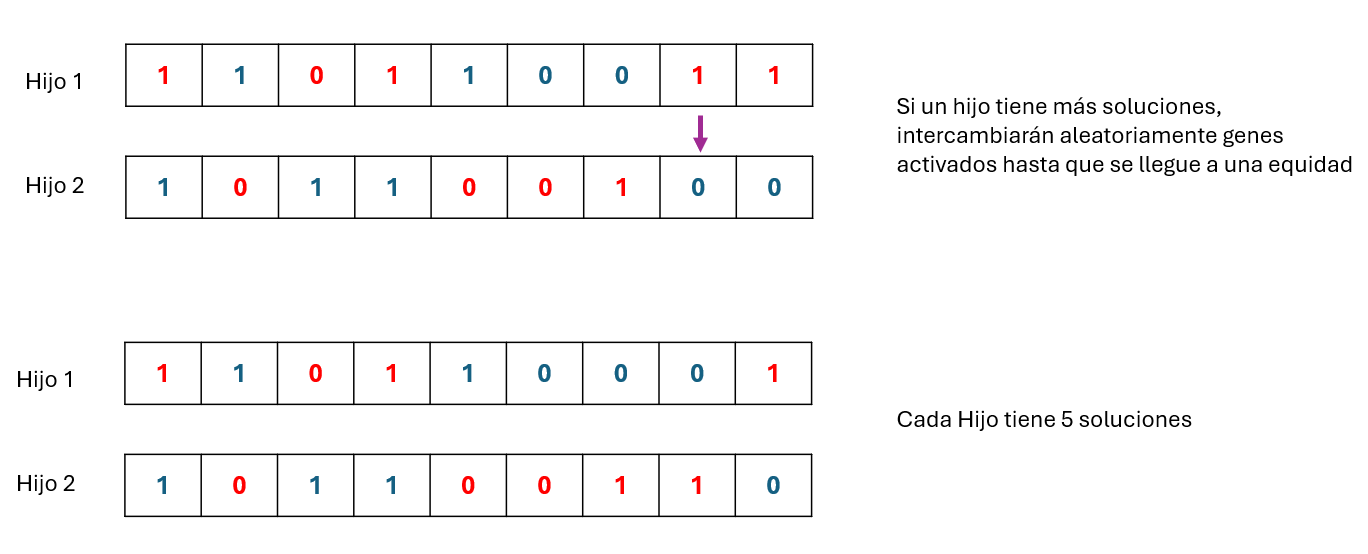

Se utilizarán los operadores de mutación de swap, multiswap, inserción, inversión y perturbación

<b>Mutación swap:</b>
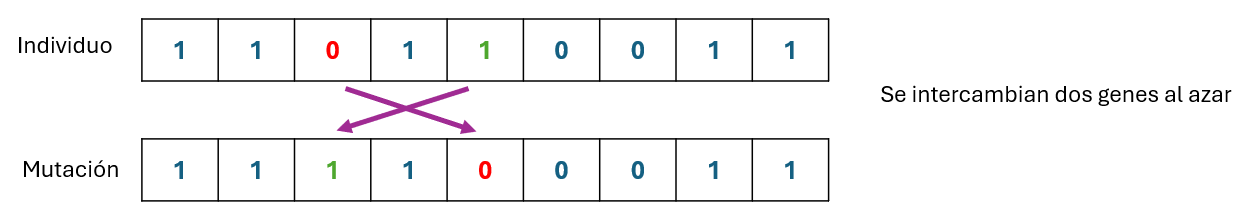

<b>Mutación multiswap:</b>
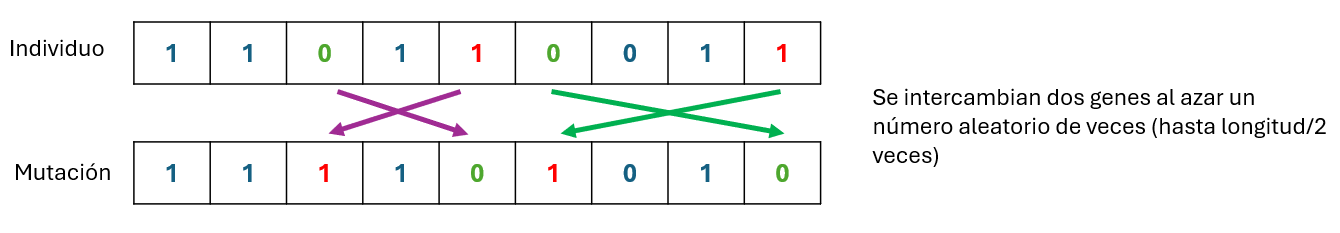

<b>Mutación por inserción:</b>
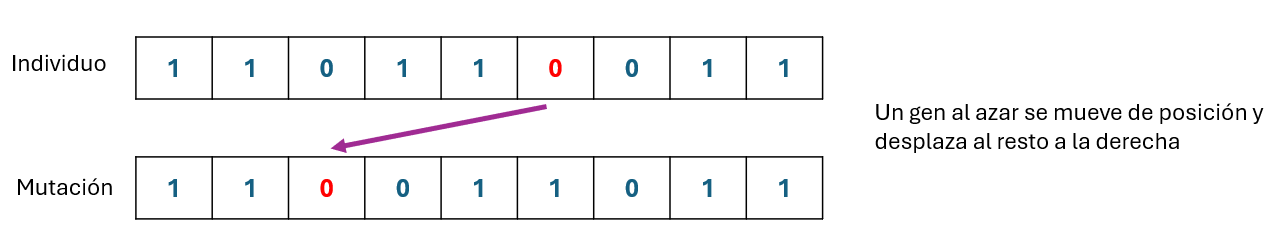

<b>Mutación por inversión:</b>
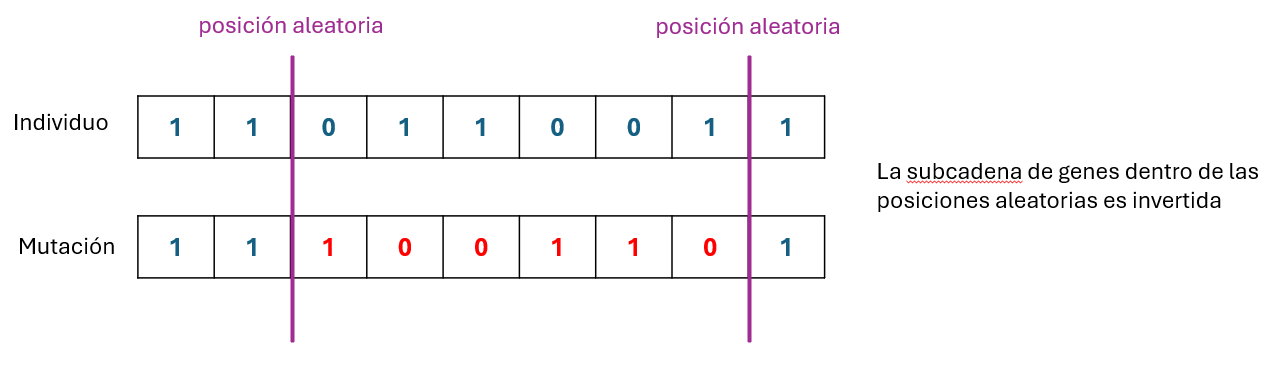

<b>Mutación por perturbación:</b>
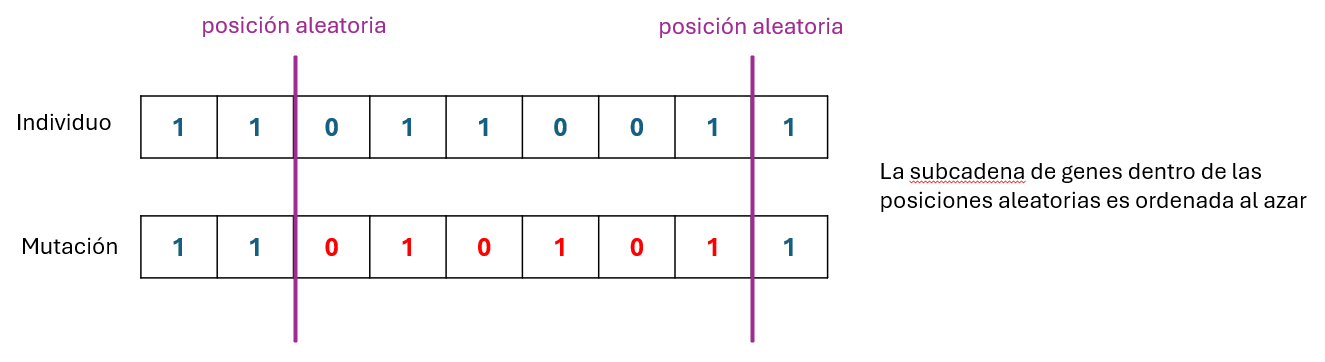

# Implementación de individuo y operadores de mutación
Implementa el Individuo del algoritmo genético y sus operadores

In [ ]:
class Individual:
    def __init__(self, chromosome):  # el constructor recibe un cromosoma
        self.chromosome = chromosome[:]
        self.suma_dist = -1
        self.suma_pob = -1
        self.fitness = -1  # -1 indica que el individuo no ha sido evaluado

    def crossover_onepoint(self, other):
        "Retorna dos nuevos individuos del cruzamiento de un punto entre individuos self y other "
        c = random.randrange(len(self.chromosome))
        ind1 = Individual(self.chromosome[:c] + other.chromosome[c:])
        ind2 = Individual(other.chromosome[:c] + self.chromosome[c:])
        return [ind1, ind2]

    def custom_onepoint(self, other):
        c = random.randrange(len(self.chromosome))
        cant_unos = self.chromosome.count(1)

        ind1 = Individual(self.chromosome[:c] + other.chromosome[c:])
        ind2 = Individual(other.chromosome[:c] + self.chromosome[c:])

        # Luego, se traspasa el excedente de cromosomas del cromosoma con más 1s al de menos 1s. Se eligen los genesa traspasar de manera aleatoria
        cant_ind1 = ind1.chromosome.count(1)
        cant_ind2 = ind2.chromosome.count(1)

        if cant_ind1 != cant_ind2:
          # se determina el cromosoma con más 1s
          big_ind = ind1 if cant_ind1 > cant_ind2 else ind2
          small_ind = ind1 if cant_ind1 < cant_ind2 else ind2

          # se determina la cantidad de 1s a traspasar y las posiciones candidatas
          cant_traspaso = max(cant_ind1,cant_ind2) - cant_unos
          posiciones_unos = [i for i in range(0, len(big_ind.chromosome)) if big_ind.chromosome[i] == 1]

          # se intenta traspasar 1s hasta lograr la cantidad deseada
          while cant_traspaso > 0:
            pos_traspaso = random.choice(posiciones_unos)
            posiciones_unos.remove(pos_traspaso)

            if small_ind.chromosome[pos_traspaso] == 0:
              small_ind.chromosome[pos_traspaso] = 1
              big_ind.chromosome[pos_traspaso] = 0
              cant_traspaso -= 1

            if len(posiciones_unos) == 0:
              break

          ind1 = big_ind
          ind2 = small_ind

        return [ind1, ind2]

    def crossover_uniform(self, other):
        chromosome1 = []
        chromosome2 = []
        "Retorna dos nuevos individuos del cruzamiento uniforme entre self y other "
        for i in range(len(self.chromosome)):
            if random.uniform(0, 1) < 0.5:
                chromosome1.append(self.chromosome[i])
                chromosome2.append(other.chromosome[i])
            else:
                chromosome1.append(other.chromosome[i])
                chromosome2.append(self.chromosome[i])
        ind1 = Individual(chromosome1)
        ind2 = Individual(chromosome2)

        return [ind1, ind2]


    def custom_uniform(self, other):
        cant_unos = self.chromosome.count(1)
        chromosome1 = []
        chromosome2 = []

        "Retorna dos nuevos individuos del cruzamiento uniforme entre self y other "
        for i in range(len(self.chromosome)):
            if random.uniform(0, 1) < 0.5:
                chromosome1.append(self.chromosome[i])
                chromosome2.append(other.chromosome[i])
            else:
                chromosome1.append(other.chromosome[i])
                chromosome2.append(self.chromosome[i])
        ind1 = Individual(chromosome1)
        ind2 = Individual(chromosome2)

        # Luego, se traspasa el excedente de cromosomas del cromosoma con más 1s al de menos 1s. Se eligen los genesa traspasar de manera aleatoria
        cant_ind1 = ind1.chromosome.count(1)
        cant_ind2 = ind2.chromosome.count(1)

        if cant_ind1 != cant_ind2:
          # se determina el cromosoma con más 1s
          big_ind = ind1 if cant_ind1 > cant_ind2 else ind2
          small_ind = ind1 if cant_ind1 < cant_ind2 else ind2

          # se determina la cantidad de 1s a traspasar y las posiciones candidatas
          cant_traspaso = max(cant_ind1,cant_ind2) - cant_unos
          posiciones_unos = [i for i in range(0, len(big_ind.chromosome)) if big_ind.chromosome[i] == 1]

          # se intenta traspasar 1s hasta lograr la cantidad deseada
          while cant_traspaso > 0:
            pos_traspaso = random.choice(posiciones_unos)
            posiciones_unos.remove(pos_traspaso)

            if small_ind.chromosome[pos_traspaso] == 0:
              small_ind.chromosome[pos_traspaso] = 1
              big_ind.chromosome[pos_traspaso] = 0
              cant_traspaso -= 1

            if len(posiciones_unos) == 0:
              break

          ind1 = big_ind
          ind2 = small_ind

        return [ind1, ind2]

    def mutation_flip(self):
        "Cambia el alelo de un gen escogido aleatoriamente."
        new_chromosome = deepcopy(self.chromosome)
        mutGene = random.randrange(0,len(new_chromosome))   # escoge un gen para mutar
        if new_chromosome[mutGene] == 0:
            new_chromosome[mutGene] = 1
        else:
            new_chromosome[mutGene] = 0
        return Individual(new_chromosome)

    def mutation_multiflip(self):
        """
        Cambia los alelos de un conjunto de genes escogidos aleatoriamente (hasta un maximo de 50% de genes).
        """
        new_chromosome = deepcopy(self.chromosome)

        num_genes_to_mutate = random.randint(1, len(new_chromosome) // 2)   # escoge la cantidad de genes para mutar
        genes_to_mutate_indices = random.sample(range(len(new_chromosome)), num_genes_to_mutate) # escoge los índices al azar

        # muta los genes seleccionados
        for gene_i in genes_to_mutate_indices:
            if new_chromosome[gene_i] == 0:
                new_chromosome[gene_i] = 1
            else:
                new_chromosome[gene_i] = 0

        return Individual(new_chromosome)

    def mutation_swap(self):
        "Hace swap de dos genes escogido aleatoriamente."
        new_chromosome = deepcopy(self.chromosome)
        mutGene1 = random.randrange(0,len(new_chromosome))   # escoge un gen para mutar
        mutGene2 = random.randrange(0,len(new_chromosome))   # escoge un gen para mutar

        new_chromosome[mutGene1], new_chromosome[mutGene2] = new_chromosome[mutGene2], new_chromosome[mutGene1]

        return Individual(new_chromosome)

    def mutation_multiswap(self):
        """
        Hace swap un número aleatorio de veces (hasta un maximo de 50% de genes).
        """
        new_chromosome = deepcopy(self.chromosome)

        num_genes_to_mutate = random.randint(1, len(new_chromosome) // 2)   # escoge la cantidad de genes para mutar

        # muta los genes seleccionados
        for gene_i in range(0,num_genes_to_mutate):
            mutGene1 = random.randrange(0,len(new_chromosome))   # escoge un gen para mutar
            mutGene2 = random.randrange(0,len(new_chromosome))   # escoge un gen para mutar

            new_chromosome[mutGene1], new_chromosome[mutGene2] = new_chromosome[mutGene2], new_chromosome[mutGene1]

        return Individual(new_chromosome)

    def mutation_inversion(self):
        """
        Elige dos puntos de corte e invierte los genes entre ambos
        """
        new_chromosome = deepcopy(self.chromosome)

        # Elige dos puntos de corte aleatorios
        point1 = random.randint(0, len(new_chromosome) - 1)
        point2 = random.randint(0, len(new_chromosome) - 1)
        point1, point2 = min(point1, point2), max(point1, point2)

        # Invierte los genes entre los puntos de corte
        segmento_invertir = new_chromosome[point1:point2 + 1]
        new_chromosome[point1:point2 + 1] = segmento_invertir[::-1]

        return Individual(new_chromosome)

    def mutation_perturbacion(self):
        """
        Elige dos puntos de corte y reordena aleatoriamente los genes entre ambos
        """
        new_chromosome = deepcopy(self.chromosome)

        # Elige dos puntos de corte aleatorios
        point1 = random.randint(0, len(new_chromosome) - 1)
        point2 = random.randint(0, len(new_chromosome) - 1)
        point1, point2 = min(point1, point2), max(point1, point2)

        # Invierte los genes entre los puntos de corte
        segmento_invertir = new_chromosome[point1:point2 + 1]
        new_chromosome[point1:point2 + 1] = random.sample(segmento_invertir, len(segmento_invertir))

        return Individual(new_chromosome)

    def mutation_insercion(self):
        """
        Elige un gen y lo desplaza a una posición aleatoria
        """
        new_chromosome = deepcopy(self.chromosome)
        mutGenePos = random.randrange(0,len(new_chromosome))
        newGenPos = random.randrange(0,len(new_chromosome))

        mutGenVal = new_chromosome.pop(mutGenePos)

        new_chromosome = new_chromosome[:newGenPos] + [mutGenVal] + new_chromosome[newGenPos:]

        return Individual(new_chromosome)


In [ ]:
ind1 = Individual([0,0,1,1,1,0,1,0,0,0,1])
ind2 = Individual([1,0,1,1,0,1,0,0,1,0,0])

indx = ind1.custom_onepoint(ind2)
print(indx[0].chromosome)
print(indx[1].chromosome)

[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1]
[0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0]


In [ ]:
ind3 = ind1.mutation_insercion()
print(ind1.chromosome)
print(ind3.chromosome)

[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1]
[0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1]


# Definición de funciones de fitness
Implementa las funciones para obtener el fitness para el problema objetivo y mono objetivo

## Suma de distancias
Implementa la suma de distancias de todos los pares del cromosoma

Implementa la función semiverseno (haversine) para calcular la distancia entre dos puntos de una esfera. Se utiliza R = 6371km como aproximación al radio de la tierra.

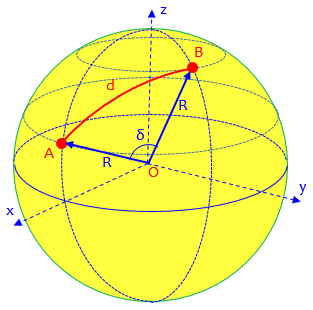

In [ ]:
def haversine(lat1, lon1, lat2, lon2):
    # Radio de la Tierra en kilómetros
    R = 6371.0

    # Convertir grados a radianes
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # Diferencia de longitudes y latitudes
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Fórmula de Haversine
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Distancia en metros
    dist = R * c * 1000

    return dist

Implementa la función de suma de distancias entre todos los pares

In [ ]:
def get_suma_dist(posiciones_unos, items):
    # Calcula las distancias entre todos los pares
    suma_dist = 0
    for i in range(0, len(posiciones_unos)):
      for j in range(i+1, len(posiciones_unos)):
        c1 = items[posiciones_unos[i]]
        c2 = items[posiciones_unos[j]]
        suma_dist += haversine(c1.latitud,c1.longitud,c2.latitud,c2.longitud)
        #print(f'Agregar distancia {c1.desc} y {c2.desc}: {suma_dist}')

    return suma_dist

## Suma de poblaciones
Implementa la función de suma de poblaciones 500m a la redonda

In [ ]:
def get_suma_pob(posiciones_unos, items):
    # Calcula la suma de poblaciones
    suma_pob = 0
    for i in range(0, len(posiciones_unos)):
      c1 = items[posiciones_unos[i]]
      suma_pob += c1.pob500m

    return suma_pob

## Fitness mono objetivo
Implementa la función de fitness mono objetivo: Sumatoria de distancias + Sumatoria de poblaciones. Retorna una tupla con el fitness, suma de distancais y suma de población

In [ ]:
def get_fitness_monoobjetivo(chromosome, items, max_loc):
    posiciones_unos = [i for i in range(0, len(chromosome)) if chromosome[i] == 1]

    suma_dist = get_suma_dist(posiciones_unos,items)
    suma_pob = get_suma_pob(posiciones_unos,items)
    fitness = 0 # retorna 0 si se supera el número máximo de localizaciones

    if len(posiciones_unos) <= max_loc:
      fitness = suma_dist + suma_pob

    return fitness, suma_dist, suma_pob

## Fitness multi objetivo
Implementa la función de fitness multi objetivo: Sumatoria de distancias y Sumatoria de poblaciones. Retorna una tupla con el fitness, suma de distancais y suma de población

In [ ]:
def get_fitness_multiobjetivo(chromosome, items, max_loc):
    posiciones_unos = [i for i in range(0, len(chromosome)) if chromosome[i] == 1]

    suma_dist = get_suma_dist(posiciones_unos,items)
    suma_pob = get_suma_pob(posiciones_unos,items)
    fitness = np.zeros(2) # retorna [0,0] si se supera el número máximo de localizaciones

    if len(posiciones_unos) <= max_loc:
      fitness[0] = suma_dist
      fitness[1] = suma_pob

    return fitness, suma_dist, suma_pob

# Definición de función de evaluación
Implementa la función de evaluación de una población. Recibe la función de fitness (mono o multi objetivo) como parámetro

In [ ]:
def evaluate_population(population, items, max_loc, get_fitness):
    pop_size = len(population)

    for i in range(pop_size):
        if population[i].fitness == -1: # evalua solo si el individuo no esta evaluado
            population[i].fitness, population[i].suma_dist, population[i].suma_pob = get_fitness(population[i].chromosome, items, max_loc)

# Definición de función para inicializar la población
Implementa la función para inicializar la pobliación de manera aleatoria. Se envía como parámetro la cantidad de genes que tendrán 1 como valor (máximo de localizaciones)

In [ ]:
def init_population(pop_size, chromosome_size, max_loc):
    #Inicializa una poblacion de pop_size individuos, cada cromosoma de individuo de tamaño chromosome_size y con max_loc genes = 1
    population = []
    for i in range(pop_size):
        new_chromosome = [0] * chromosome_size
        for j in range(max_loc):
            new_chromosome[j] = 1
        random.shuffle(new_chromosome)
        population.append(Individual(new_chromosome))
    return population

# Definición de operadores de selección
Implementa las funciones de selección para el algoritmo genético mono objetivo

## Selección por ruleta
Implementa la función de selección por ruleta

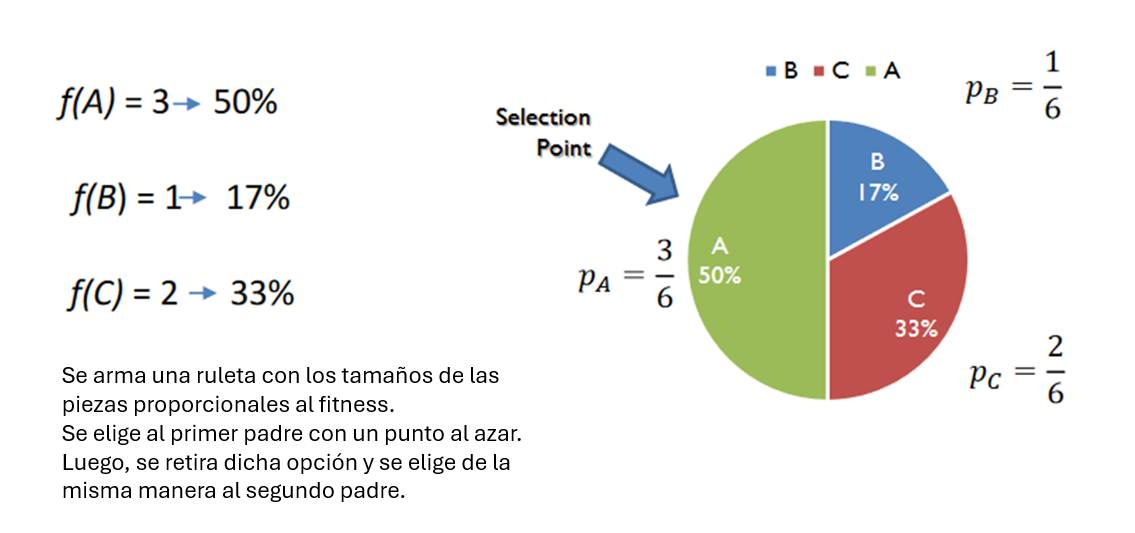

In [ ]:
def select_parents_roulette(population):
    popsize = len(population)

    # Escoje el primer padre
    sumfitness = sum([indiv.fitness for indiv in population])  # suma total del fitness de la poblacion
    pickfitness = random.uniform(0, sumfitness)   # escoge un numero aleatorio entre 0 y sumfitness
    cumfitness = 0     # fitness acumulado
    for i in range(popsize):
        cumfitness += population[i].fitness
        if cumfitness > pickfitness:
            iParent1 = i
            break

    # Escoje el segundo padre, desconsiderando el primer padre
    sumfitness = sumfitness - population[iParent1].fitness # retira el fitness del padre ya escogido
    pickfitness = random.uniform(0, sumfitness)   # escoge un numero aleatorio entre 0 y sumfitness
    cumfitness = 0     # fitness acumulado
    for i in range(popsize):
        if i == iParent1: continue   # si es el primer padre
        cumfitness += population[i].fitness
        if cumfitness > pickfitness:
            iParent2 = i
            break
    return (population[iParent1], population[iParent2])

## Selección por torneo
Implementa la función de selección por torneo

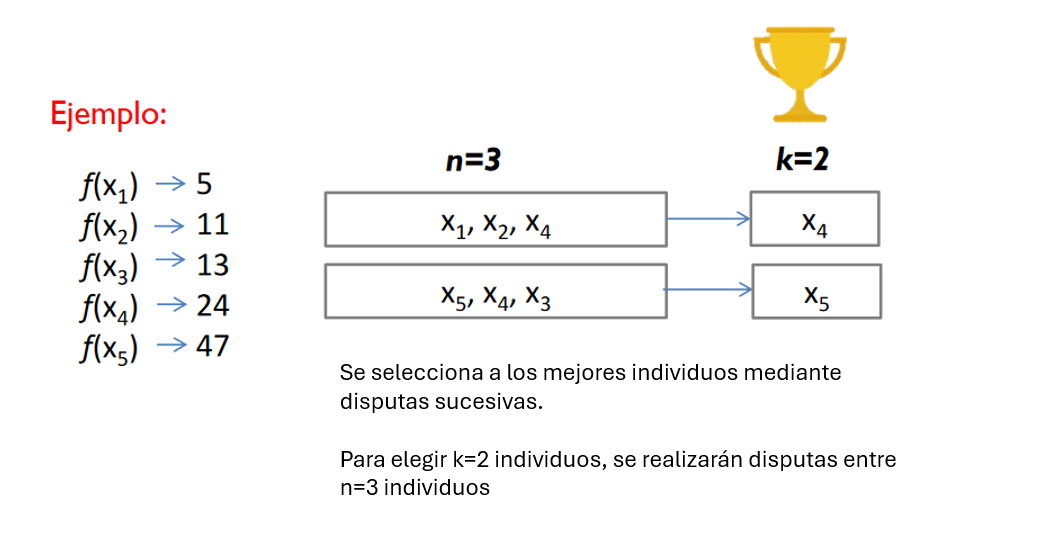

In [ ]:
def select_parents_tournament(population, tournament_size):
    # Escoje el primer padre
    list_indiv=[]
    x1 = np.random.permutation(len(population) )
    y1= x1[0:tournament_size]
    for i in range(tournament_size):
        list_indiv.append(population[y1[i]].fitness)

    iParent1=np.argmax(list_indiv)

    # Escoje el segundo padre, desconsiderando el primer padre
    x2 = np.delete(x1, iParent1)
    x2 = np.random.permutation(x2)
    list_indiv=[]
    y2= x2[0:tournament_size]
    for i in range(tournament_size):
        list_indiv.append(population[y2[i]].fitness)
    iParent2=np.argmax(list_indiv)

    return (population[x1[iParent1]],population[x2[iParent2]])

## Selección de sobrevivientes por ranking
Implementa la función de selección de sobrevivientes por ranking

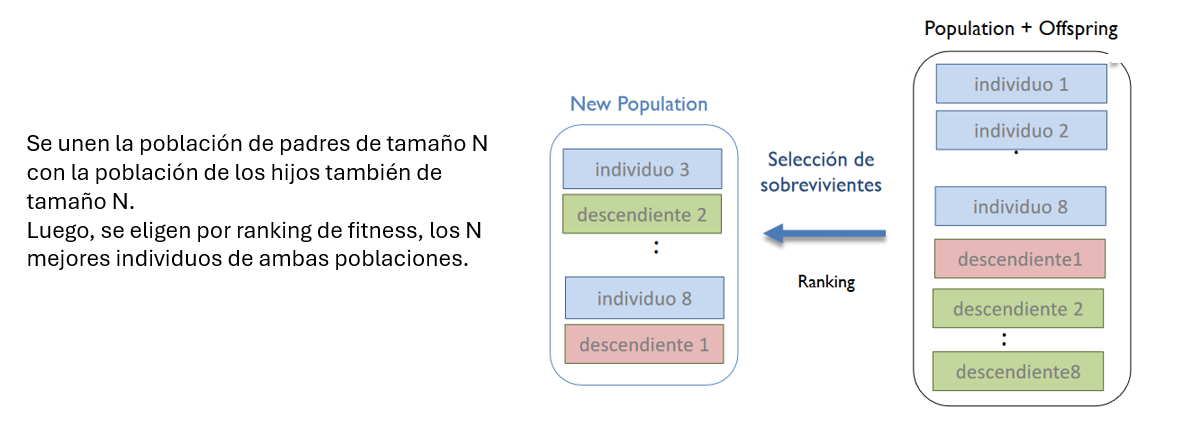

In [ ]:
def select_survivors_ranking(population, offspring_population, numsurvivors):
    next_population = []
    population.extend(offspring_population) # une las dos poblaciones
    isurvivors = sorted(range(len(population)), key=lambda i: population[i].fitness, reverse=True)[:numsurvivors]
    for i in range(numsurvivors):
        next_population.append(population[isurvivors[i]])
    return next_population

# Funciones auxiliares para el algoritmo NSGA-II
Implementa funciones auxiliares para el algoritmo multiobjetivo NSGA II

In [ ]:
def build_offspring_population(population, crossover, mutation, pmut):
    """ Construye una poblacion hija con los operadores de cruzamiento y mutacion pasados
        crossover:  operador de cruzamiento
        mutation:   operador de mutacion
        pmut:       taza de mutacion
    """
    pop_size = len(population)

    ## Selecciona parejas de individuos (mating_pool) para cruzamiento

    mating_pool = []
    for i in range(int(pop_size/2)):
        # escoje dos individuos diferentes aleatoriamente de la poblacion
        permut = np.random.permutation( pop_size )
        mating_pool.append( (population[permut[0]], population[permut[1]] ) )

    ## Crea la poblacion descendencia cruzando las parejas del mating pool
    offspring_population = []
    for i in range(len(mating_pool)):
        if crossover == "custom_onepoint":
            offspring_population.extend( mating_pool[i][0].custom_onepoint(mating_pool[i][1]) ) # cruzamiento 1 punto
        elif crossover == "custom_uniform":
            offspring_population.extend( mating_pool[i][0].custom_uniform(mating_pool[i][1]) ) # cruzamiento uniforme
        else:
            raise NotImplementedError

    ## Aplica el operador de mutacion con probabilidad pmut en cada hijo generado
    for i in range(len(offspring_population)):
        if random.uniform(0, 1) < pmut:
            if mutation == "swap":
                offspring_population[i] = offspring_population[i].mutation_swap() # intercambia la posición de dos genes
            elif mutation == "inversion":
                offspring_population[i] = offspring_population[i].mutation_inversion() # invierte todos los genes entre 2 puntos al azar
            elif mutation == "multiswap":
                offspring_population[i] = offspring_population[i].mutation_multiswap() # realiza un número aleatorio de swaps
            elif mutation == "perturbacion":
                offspring_population[i] = offspring_population[i].mutation_perturbacion() # reordena aleatoriamente un segmento del cromosoma
            elif mutation == "insercion":
                offspring_population[i] = offspring_population[i].mutation_insercion() # desplaza un gen a una posición aleat
            else:
                raise NotImplementedError

    return offspring_population

In [ ]:
def get_crowding_distances(fitnesses):
    """
    La distancia crowding de un individuo es la diferencia del fitness mas proximo hacia arriba menos el fitness mas proximo
    hacia abajo. El valor crowding total es la suma de todas las distancias crowdings para todos los fitness
    """

    pop_size = len(fitnesses[:, 0])
    num_objectives = len(fitnesses[0, :])

    # crea matriz crowding. Filas representan individuos, columnas representan objectives
    crowding_matrix = np.zeros((pop_size, num_objectives))

    # normalisa los fitnesses entre 0 y 1 (ptp es max - min)
    normalized_fitnesses = (fitnesses - fitnesses.min(0)) / fitnesses.ptp(0)

    for col in range(num_objectives):   # Por cada objective
        crowding = np.zeros(pop_size)

        # puntos extremos tienen maximo crowding
        crowding[0] = 1
        crowding[pop_size - 1] = 1

        # ordena los fitness normalizados del objectivo actual
        sorted_fitnesses = np.sort(normalized_fitnesses[:, col])
        sorted_fitnesses_index = np.argsort(normalized_fitnesses[:, col])

        # Calcula la distancia crowding de cada individuo como la diferencia de score de los vecinos
        crowding[1:pop_size - 1] = (sorted_fitnesses[2:pop_size] - sorted_fitnesses[0:pop_size - 2])

        # obtiene el ordenamiento original
        re_sort_order = np.argsort(sorted_fitnesses_index)
        sorted_crowding = crowding[re_sort_order]

        # Salva las distancias crowdingpara el objetivo que se esta iterando
        crowding_matrix[:, col] = sorted_crowding

    # Obtiene las distancias crowding finales sumando las distancias crowding de cada objetivo
    crowding_distances = np.sum(crowding_matrix, axis=1)

    return crowding_distances

In [ ]:
def select_by_crowding(population, num_individuals):
    """
    Selecciona una poblacion de individuos basado en torneos de pares de individuos: dos individuos se escoge al azar
    y se selecciona el mejor segun la distancia crowding. Se repite hasta obtener num_individuals individuos
    """
    population = deepcopy(population)
    pop_size = len(population)

    num_objectives = len(population[0].fitness)

    # extrae los fitness de la poblacion en la matriz fitnesses
    fitnesses = np.zeros([pop_size, num_objectives])
    for i in range(pop_size): fitnesses[i,:] = population[i].fitness

    # obtiene las  distancias  crowding
    crowding_distances = get_crowding_distances(fitnesses)

    population_selected = []   # poblacion escogida

    for i in range(num_individuals):  # por cada individuo a seleccionar

        # escoje dos individuos aleatoriamente de la poblacion no escogida aun
        permut = np.random.permutation( len(population) )
        ind1_id = permut[0]
        ind2_id = permut[1]

        # Si ind1_id es el mejor
        if crowding_distances[ind1_id] >= crowding_distances[ind2_id]:

            # traslada el individuo ind1 de population a la lista de individuos seleccionados
            population_selected.append( population.pop(ind1_id) )
            # remueve la distancia crowding del individuo seleccionado
            crowding_distances = np.delete(crowding_distances, ind1_id, axis=0)

        else:  # Si ind2_id es el mejor

            # traslada el individuo ind2 de population a la lista de individuos seleccionados
            population_selected.append( population.pop(ind2_id) )
            # remueve la distancia crowding del individuo seleccionado
            crowding_distances = np.delete(crowding_distances, ind2_id, axis=0)

    return (population_selected)

In [ ]:
def get_paretofront_population(population):
    """
    Obtiene de population la poblacion de individups de la frontera de Pareto,
    """
    population = deepcopy(population)
    pop_size = len(population)

    # todos los individuos son inicialmente asumidos como la frontera de Pareto
    pareto_front = np.ones(pop_size, dtype=bool)

    for i in range(pop_size): # Compara cada individuo contra todos los demas
        for j in range(pop_size):
            # Chequea si individuo 'i' es dominado por individuo 'j'
            #if all(population[j].fitness >= population[i].fitness) and any(population[j].fitness > population[i].fitness):
            #if str(all(population[j].fitness >= population[i].fitness)) and str(any(population[j].fitness > population[i].fitness)):
            if all(np.asarray(population[j].fitness) >= np.asarray(population[i].fitness)) and any(np.asarray(population[j].fitness) > np.asarray(population[i].fitness)):
                # j domina i -> señaliza que individuo 'i' como no siendo parte de la frontera de Pareto
                pareto_front[i] = 0
                break   # Para la busqueda para 'i' (no es necesario hacer mas comparaciones)

    paretofront_population = []
    for i in range(pop_size):  # construye la lista de individuos de la frontera de Pareto
        if pareto_front[i] == 1: paretofront_population.append(population[i])

    return paretofront_population

In [ ]:
def build_next_population(population, min_pop_size, max_pop_size):
    """
    Construye la poblacion de la siguiente generacion añadiendo sucesivas fronteras de Pareto hasta
    tener una poblacion de al menos min_pop_size individuos. Reduce la frontera de Pareto con el metodo de
    crowding distance si al agregar la frontera excede el tamaño maximo de la poblacion (max_pop_size)
    """
    population = deepcopy(population)
    pareto_front = []
    next_population = []

    while len(next_population) < min_pop_size:   # mientras la poblacion no tenga el tamaño minimo
        # obtiene la poblacion frontera de Pareto actual
        paretofront_population = get_paretofront_population(population)

        # si poblacion actual + paretofront excede el maximo permitido -> reduce paretofront con el metodo de crowding
        combined_population_size = len(next_population) + len(paretofront_population)
        if  combined_population_size > max_pop_size:
            paretofront_population = select_by_crowding( paretofront_population, max_pop_size-len(next_population) )

        # Adiciona la frontera de Pareto (original o reducida) a la poblacion en construccion
        next_population.extend( paretofront_population )

        # remueve de population los individuos que fueron agregados a next_population
        for i in range( len(paretofront_population) ):
            for j in range( len(population) ):
                if all( np.asarray(paretofront_population[i].chromosome) == np.asarray(population[j].chromosome) ):
                    del(population[j])
                    break

    return next_population

In [ ]:
def plot_pareto(pareto_front_population,aditional_points):
  ## Plotea los individuos de la frontera de Pareto final
  pop_size = len(pareto_front_population)
  num_objectives = len(pareto_front_population[0].fitness)

  # extrae los fitness de la poblacion en la matriz fitnesses
  fitnesses = np.zeros([pop_size, num_objectives])
  for i in range(pop_size): fitnesses[i,:] = pareto_front_population[i].fitness

  x = fitnesses[:, 0]
  y = fitnesses[:, 1]
  plt.figure(figsize=(10, 8))
  plt.xlabel('Objetivo 1: Suma de distancias')
  plt.ylabel('Objetivo 2: Suma de población')
  plt.scatter(x,y)

  for i in range(0,len(aditional_points)):
    pt = aditional_points[i]
    plt.scatter(pt.suma_dist, pt.suma_pob, color='red', label='Monoobjetivo')
  plt.show()

# Algoritmos genéticos
Implementa los algoritmos genéticos mono y multi objetivo

## Algoritmo genético mono objetivo
Implementa el algoritmo genético mono objetivo

In [ ]:
def genetic_algorithm_monoobjetivo(poblacion_inicial, items, max_loc, ngen=100, pmut=0.1,
                      crossover="onepoint", mutation="flip",
                      selection_parents_method="roulette",
                      selection_survivors_method="ranking"):
    """Algoritmo Genetico para el problema
        items:      pool de items a escoger.
                    Debe ser una lista de objetos de clase Item
        max_loc: maxima cantidad de localizaciones
        ngen:       maximo numero de generaciones
        pmut:       tasa de mutacion
        crossover:  operador de cruzamiento
        mutation:   operador de mutacion
        selection_parents_method: método de selección de padres para cruzamiento
        selection_survivors_method: método de selección de sobrevivientes
    """

    population = deepcopy(poblacion_inicial)  # copia la poblacion inicial en una nueva variable para no alterar la inicial

    popsize = len(population)
    evaluate_population(population, items, max_loc, get_fitness_monoobjetivo)  # evalua la poblacion inicial
    ibest = sorted(range(len(population)), key=lambda i: population[i].fitness, reverse=True)[:1]  # mejor individuo
    bestfitness = [population[ibest[0]].fitness]  # fitness del mejor individuo
    print("Poblacion inicial, best_fitness = {}".format(population[ibest[0]].fitness))

    for g in range(ngen):   # Por cada generacion

        ## Selecciona parejas de individuos (mating_pool) para cruzamiento con el metodo de la ruleta
        mating_pool = []
        for i in range(int(popsize/2)):
            if selection_parents_method == "roulette":
                mating_pool.append(select_parents_roulette(population))
            elif selection_parents_method == "tournament":
                mating_pool.append(select_parents_tournament(population, 3))
            else:
                raise NotImplementedError
        ## Crea la poblacion descendencia cruzando las parejas del mating pool
        offspring_population = []
        for i in range(len(mating_pool)):
            if crossover == "custom_onepoint":
                offspring_population.extend( mating_pool[i][0].custom_onepoint(mating_pool[i][1]) ) # cruzamiento 1 punto
            elif crossover == "custom_uniform":
                offspring_population.extend( mating_pool[i][0].custom_uniform(mating_pool[i][1]) ) # cruzamiento uniforme
            else:
                raise NotImplementedError

        ## Aplica el operador de mutacion con probabilidad pmut en cada hijo generado
        for i in range(len(offspring_population)):
            if random.uniform(0, 1) < pmut:
                if mutation == "swap":
                    offspring_population[i] = offspring_population[i].mutation_swap() # intercambia la posición de dos genes
                elif mutation == "inversion":
                    offspring_population[i] = offspring_population[i].mutation_inversion() # invierte todos los genes entre 2 puntos al azar
                elif mutation == "multiswap":
                    offspring_population[i] = offspring_population[i].mutation_multiswap() # realiza un número aleatorio de swaps
                elif mutation == "perturbacion":
                    offspring_population[i] = offspring_population[i].mutation_perturbacion() # reordena aleatoriamente un segmento del cromosoma
                elif mutation == "insercion":
                    offspring_population[i] = offspring_population[i].mutation_insercion() # desplaza un gen a una posición aleat
                else:
                    raise NotImplementedError

        ## Evalua la poblacion descendencia creada
        evaluate_population(offspring_population, items, max_loc, get_fitness_monoobjetivo) # evalua la poblacion descendencia

        ## Selecciona individuos para la sgte. generación
        if selection_survivors_method == "ranking":
            population = select_survivors_ranking(population, offspring_population, popsize) #metodo de ranking
        else:
            raise NotImplementedError

        ## Almacena la historia del fitness del mejor individuo
        ibest = sorted(range(len(population)), key=lambda i: population[i].fitness, reverse=True)[:1]
        bestfitness.append(population[ibest[0]].fitness)

        if ((g+1) % 50 == 0):  # muestra resultados cada 50 generaciones
            print("generacion {} (de {}), (Mejor fitness = {})".format(g+1, ngen, population[ibest[0]].fitness))

    print("Mejor individuo en la ultima generacion = {} (fitness = {})".format(population[ibest[0]].chromosome, population[ibest[0]].fitness))
    return population[ibest[0]], bestfitness  # devuelve el mejor individuo y la lista de mejores fitness x gen

## Algoritmo genético multi objetivo
Implementa el algoritmo genético multi objetivo NSGA-II

In [ ]:
def genetic_algorithm_multiobjetivo(poblacion_inicial, items, max_loc, ngen=100, pmut=0.1,
                      crossover="onepoint", mutation="flip"):

  popsize = len(poblacion_inicial)
  P = deepcopy(poblacion_inicial)

  #  evalua la poblacion inicial
  evaluate_population(P, items, max_loc, get_fitness_multiobjetivo)

  ## Ejecuta los ciclos evolutivos
  for g in range(ngen):   # Por cada generacion

    if (g+1) %50 == 0:
        print ('generacion {} (de {}) '.format(g+1, ngen))

    ## genera y evalua la poblacion hija
    Q = build_offspring_population(P, crossover, mutation, pmut)
    evaluate_population(Q, items, max_loc, get_fitness_multiobjetivo)

    ## une la poblacion padre y la poblacion hija
    P.extend(Q)

    ## Construye la poblacion de la siguiente generacion
    P = build_next_population(P, popsize, popsize)

  return P

# Definición de función de pool de items
Implementa una función que lee un archivo y genera el pool de items

In [ ]:
def leer_archivo(nombre_archivo):
    items = []
    # Leer el archivo CSV con pandas
    df = pd.read_csv(nombre_archivo)
    # Iterar sobre las filas del DataFrame
    for index, row in df.iterrows():
        # Crear un objeto Item para cada fila y agregarlo a la lista
        items.append(Item(row['ID'], row['Descripcion'], row['Latitud'], row['Longitud'], row['Poblacion500m']))
    return items

# Definición de función de plot de solución
Implementa el plot de un cromosoma

In [ ]:
def df_solucion(chromosome):
  posiciones = [i for i in range(0, len(chromosome)) if chromosome[i] == 1]

  df = pd.DataFrame({
    'id': [itemPool[i].id for i in posiciones],
    'desc': [itemPool[i].desc for i in posiciones],
    'latitud': [itemPool[i].latitud for i in posiciones],
    'longitud': [itemPool[i].longitud for i in posiciones],
    'pob500m': [itemPool[i].pob500m for i in posiciones]
  })

  return df

In [ ]:
def plot_cromosoma(chromosome):
  df = df_solucion(chromosome)
  df['Size'] = 500

  color_scale = [(0, 'blue'), (1,'red')]

  fig = px.scatter_mapbox(df,
                        lat="latitud",
                        lon="longitud",
                        zoom=10,
                        size="Size",
                        size_max=15,
                        color="pob500m",
                        hover_name="id",
                        hover_data=["id", "desc","pob500m"],
                        color_continuous_scale=color_scale,
                        height=500,
                        width=1000)

  fig.update_layout(mapbox_style="open-street-map")
  fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
  fig.update_layout(showlegend=False)
  fig.show()

# Prueba de algoritmos
Implementa las pruebas de los algoritmos mono y multi objetivo

## Carga de archivo

In [ ]:
!wget -O 'Candidatos_supermercados.csv' 'https://raw.githubusercontent.com/miguelvg27/ia-pucp-evolutiva-trabajo/main/data/Candidatos_supermercados.csv'

--2024-04-10 15:27:26--  https://raw.githubusercontent.com/miguelvg27/ia-pucp-evolutiva-trabajo/main/data/Candidatos_supermercados.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4654 (4.5K) [text/plain]
Saving to: ‘Candidatos_supermercados.csv’

Candidatos_supermer 100%[===================>]   4.54K  --.-KB/s    in 0s      

2024-04-10 15:27:26 (50.0 MB/s) - ‘Candidatos_supermercados.csv’ saved [4654/4654]



In [ ]:
itemPool = leer_archivo('Candidatos_supermercados.csv')

## Definición de variables globales
A continuación, se definirán variables globales para su uso en las pruebas

In [ ]:
GENERATIONS = 500
POP_SIZE = 100
NUM_ITEMS = len(itemPool)
MAX_LOC = 10
CHROMOSOME_SIZE = NUM_ITEMS
ITER_TEST = 10

Listados de mutaciones y de selección

In [ ]:
cruzamiento_search = ['custom_uniform','custom_onepoint']
seleccion_search = ['tournament','roulette']

## Prueba de algoritmo mono objetivo
Se realizarán las pruebas sobre el algoritmo

### Pruebas sin mutación
A continuación, se realizan las pruebas sin mutación para elegir la mejor combinación de selección y cruzamiento

In [ ]:
resultados_list_mono_sin_mut = []
curr_iter = 0
total_iter = len(cruzamiento_search) * len(seleccion_search) * ITER_TEST
for cruzamiento in cruzamiento_search:
  for seleccion in seleccion_search:
      bestfitness_list = []
      genconvergencia_list = []
      distancia_list = []
      pob_list = []
      for it in range(0, ITER_TEST):
        curr_iter += 1
        print(f'Iteración {curr_iter}/{total_iter}')
        poblacion_inicial = init_population(POP_SIZE, CHROMOSOME_SIZE, MAX_LOC)
        best_ind, bestfitness = genetic_algorithm_monoobjetivo(poblacion_inicial, itemPool, MAX_LOC, GENERATIONS, 0.0,
                                          crossover=cruzamiento, mutation=None, selection_parents_method = seleccion, selection_survivors_method = 'ranking')

      bestfitness_list.append(best_ind.fitness)
      distancia_list.append(best_ind.suma_dist)
      pob_list.append(best_ind.suma_pob)
      genconvergencia_list.append(bestfitness.index(max(bestfitness)))

      resultados_list_mono_sin_mut.append({'cruzamiento':cruzamiento, 'seleccion':seleccion, 'mean_fitness': np.mean(bestfitness_list), 'mean_dist':np.mean(distancia_list),'mean_pob':np.mean(pob_list), 'gen_convergencia': np.mean(genconvergencia_list)})

Iteración 1/40
Poblacion inicial, best_fitness = 655649.5539623385
generacion 50 (de 500), (Mejor fitness = 685031.2548737864)
generacion 100 (de 500), (Mejor fitness = 685031.2548737864)
generacion 150 (de 500), (Mejor fitness = 685031.2548737864)
generacion 200 (de 500), (Mejor fitness = 685031.2548737864)
generacion 250 (de 500), (Mejor fitness = 685031.2548737864)
generacion 300 (de 500), (Mejor fitness = 685031.2548737864)
generacion 350 (de 500), (Mejor fitness = 685031.2548737864)
generacion 400 (de 500), (Mejor fitness = 685031.2548737864)
generacion 450 (de 500), (Mejor fitness = 685031.2548737864)
generacion 500 (de 500), (Mejor fitness = 685031.2548737864)
Mejor individuo en la ultima generacion = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0] (fitness = 685031.2548737864)
Iteración 2/40
Poblacion inicial, best_fitness = 655480.8105003488
gene

In [ ]:
df_mono_sin_mut = pd.DataFrame(resultados_list_mono_sin_mut)
df_mono_sin_mut.sort_values(by=['mean_fitness', 'gen_convergencia'], ascending=[False, True], inplace=True)
df_mono_sin_mut

,cruzamiento,seleccion,mean_fitness,mean_dist,mean_pob,gen_convergencia
1,custom_uniform,roulette,685820.917004,557120.917004,128700.0,32.0
0,custom_uniform,tournament,685055.292370,556355.292370,128700.0,14.0
2,custom_onepoint,tournament,683288.747635,552488.747635,130800.0,8.0
3,custom_onepoint,roulette,681370.134813,552970.134813,128400.0,12.0


Se eligen los mejores operadores según fitness (máximo) y generación de convergencia (mínima)

In [ ]:
best_cruzamiento = df_mono_sin_mut.iloc[0]['cruzamiento']
best_seleccion = df_mono_sin_mut.iloc[0]['seleccion']
best_cruzamiento, best_seleccion

('custom_uniform', 'roulette')

### Pruebas con mutación
Se utilizarán los mejores operadores para realizar las pruebas con mutación

In [ ]:
mut_search = ['swap','multiswap','inversion','perturbacion','insercion']
pmut_search = [0.25,0.50,0.75,1.0]

In [ ]:
resultados_list_mono = []
bestind_list = []
curr_iter = 0
total_iter = len(pmut_search) * len(mut_search) * ITER_TEST

for pmut in pmut_search:
  for mut in mut_search:
    bestfitness_list = []
    genconvergencia_list = []
    for it in range(0, ITER_TEST):
      curr_iter += 1
      print(f'Iteración {curr_iter}/{total_iter}')
      poblacion_inicial = init_population(POP_SIZE, CHROMOSOME_SIZE, MAX_LOC)
      best_ind, bestfitness = genetic_algorithm_monoobjetivo(poblacion_inicial, itemPool, MAX_LOC, GENERATIONS, pmut,
                                          crossover=best_cruzamiento, mutation=mut, selection_parents_method = best_seleccion, selection_survivors_method = 'ranking')
      bestind_list.append(best_ind)
      bestfitness_list.append(best_ind.fitness)
      distancia_list.append(best_ind.suma_dist)
      pob_list.append(best_ind.suma_pob)
      genconvergencia_list.append(bestfitness.index(max(bestfitness)))

    resultados_list_mono.append({'cruzamiento':best_cruzamiento, 'seleccion':best_seleccion, 'mut':mut, 'pmut':pmut, 'mean_fitness': np.mean(bestfitness_list), 'mean_dist':np.mean(distancia_list),'mean_pob':np.mean(pob_list), 'gen_convergencia': np.mean(genconvergencia_list)})

Iteración 1/200
Poblacion inicial, best_fitness = 655549.5302729682
generacion 50 (de 500), (Mejor fitness = 685820.9170039834)
generacion 100 (de 500), (Mejor fitness = 685820.9170039834)
generacion 150 (de 500), (Mejor fitness = 685820.9170039834)
generacion 200 (de 500), (Mejor fitness = 685820.9170039834)
generacion 250 (de 500), (Mejor fitness = 685820.9170039834)
generacion 300 (de 500), (Mejor fitness = 685820.9170039834)
generacion 350 (de 500), (Mejor fitness = 685820.9170039834)
generacion 400 (de 500), (Mejor fitness = 685820.9170039834)
generacion 450 (de 500), (Mejor fitness = 685820.9170039834)
generacion 500 (de 500), (Mejor fitness = 685820.9170039834)
Mejor individuo en la ultima generacion = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] (fitness = 685820.9170039834)
Iteración 2/200
Poblacion inicial, best_fitness = 665477.9215161167
ge

In [ ]:
df_mono = pd.DataFrame(resultados_list_mono)
df_mono.sort_values(by=['mean_fitness', 'gen_convergencia'], ascending=[False, True], inplace=True)
df_mono

,cruzamiento,seleccion,mut,pmut,mean_fitness,mean_dist,mean_pob,gen_convergencia
2,custom_uniform,roulette,inversion,0.25,685820.917004,556977.238046,128700.000000,50.7
14,custom_uniform,roulette,insercion,0.75,685820.917004,557092.205445,128698.013245,51.7
15,custom_uniform,roulette,swap,1.00,685820.917004,557093.988772,128698.136646,52.0
8,custom_uniform,roulette,perturbacion,0.50,685820.917004,557073.274747,128696.703297,54.3
10,custom_uniform,roulette,swap,0.75,685820.917004,557081.858937,128697.297297,54.4
12,custom_uniform,roulette,inversion,0.75,685820.917004,557087.822001,128697.709924,60.3
9,custom_uniform,roulette,insercion,0.50,685820.917004,557077.991802,128697.029703,67.5
5,custom_uniform,roulette,swap,0.50,685820.917004,557049.844128,128695.081967,67.6
13,custom_uniform,roulette,perturbacion,0.75,685820.917004,557090.169164,128697.872340,68.8
7,custom_uniform,roulette,inversion,0.50,685820.917004,557067.392987,128696.296296,70.6


Se eligen los mejores operadores según fitness (máximo) y generación de convergencia (mínima)

In [ ]:
best_cruzamiento = df_mono.iloc[0]['cruzamiento']
best_seleccion = df_mono.iloc[0]['seleccion']
best_mut = df_mono.iloc[0]['mut']
best_pmut = df_mono.iloc[0]['pmut']
best_cruzamiento, best_seleccion, best_mut, best_pmut

('custom_uniform', 'roulette', 'inversion', 0.25)

## Prueba de algoritmo multi objetivo
Se realiza la prueba multi objetivo con los mejores operadores obtenidos

In [ ]:
pareto_front = []
for it in range(0, ITER_TEST):
  print(f'Iteración {it+1}/{ITER_TEST}')
  q = genetic_algorithm_multiobjetivo(poblacion_inicial, itemPool, MAX_LOC, GENERATIONS, best_pmut, crossover=best_cruzamiento, mutation=best_mut)
  pareto_front.extend(get_paretofront_population(q))

Iteración 1/10
generacion 50 (de 500) 
generacion 100 (de 500) 
generacion 150 (de 500) 
generacion 200 (de 500) 
generacion 250 (de 500) 
generacion 300 (de 500) 
generacion 350 (de 500) 
generacion 400 (de 500) 
generacion 450 (de 500) 
generacion 500 (de 500) 
Iteración 2/10
generacion 50 (de 500) 
generacion 100 (de 500) 
generacion 150 (de 500) 
generacion 200 (de 500) 
generacion 250 (de 500) 
generacion 300 (de 500) 
generacion 350 (de 500) 
generacion 400 (de 500) 
generacion 450 (de 500) 
generacion 500 (de 500) 
Iteración 3/10
generacion 50 (de 500) 
generacion 100 (de 500) 
generacion 150 (de 500) 
generacion 200 (de 500) 
generacion 250 (de 500) 
generacion 300 (de 500) 
generacion 350 (de 500) 
generacion 400 (de 500) 
generacion 450 (de 500) 
generacion 500 (de 500) 
Iteración 4/10
generacion 50 (de 500) 
generacion 100 (de 500) 
generacion 150 (de 500) 
generacion 200 (de 500) 
generacion 250 (de 500) 
generacion 300 (de 500) 
generacion 350 (de 500) 
generacion 400 (de 

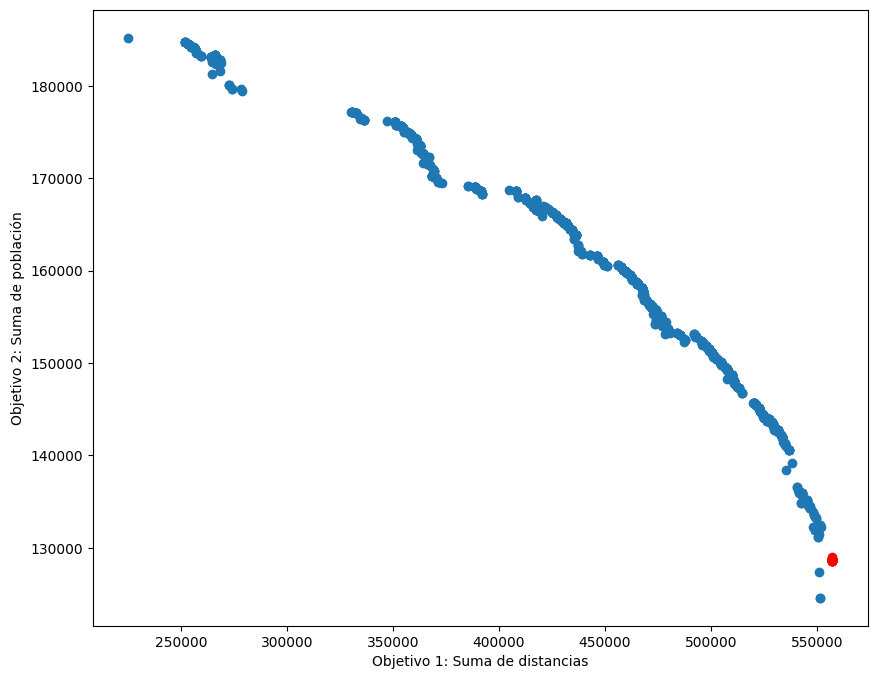

In [ ]:
best_ind_mono_ordenados = sorted(bestind_list, key=lambda x: x.fitness, reverse = True)
plot_pareto(pareto_front,best_ind_mono_ordenados)

Se generan dataframes con los resultados

In [ ]:
ind_mono = []
for ind in best_ind_mono_ordenados:
  ind_mono.append({'fitness':ind.fitness, 'suma_dist':ind.suma_dist,'suma_pob':ind.suma_pob,'chromosome':ind.chromosome})

df_ind_mono = pd.DataFrame(ind_mono)
df_ind_mono

,fitness,suma_dist,suma_pob,chromosome
0,685820.917004,557120.917004,128700,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, ..."
1,685820.917004,557120.917004,128700,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, ..."
2,685820.917004,557120.917004,128700,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, ..."
3,685820.917004,557120.917004,128700,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, ..."
4,685820.917004,557120.917004,128700,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, ..."
...,...,...,...,...
195,685760.451097,557160.451097,128600,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, ..."
196,685760.451097,557160.451097,128600,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, ..."
197,685760.451097,557160.451097,128600,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, ..."
198,685760.451097,557160.451097,128600,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, ..."


In [ ]:
ind_pareto = []
for ind in pareto_front:
  ind_pareto.append({'fitness':ind.fitness, 'suma_dist':ind.suma_dist,'suma_pob':ind.suma_pob,'chromosome':ind.chromosome})

df_ind_pareto = pd.DataFrame(ind_pareto)
df_ind_pareto

,fitness,suma_dist,suma_pob,chromosome
0,"[509677.2516857929, 148700.0]",509677.251686,148700,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, ..."
1,"[467984.396695918, 157800.0]",467984.396696,157800,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, ..."
2,"[501330.4749287331, 150800.0]",501330.474929,150800,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ..."
3,"[353594.3949922832, 175600.0]",353594.394992,175600,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, ..."
4,"[524527.1672279319, 144200.0]",524527.167228,144200,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ..."
...,...,...,...,...
995,"[334251.25210061914, 176400.0]",334251.252101,176400,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ..."
996,"[361030.82829970133, 174200.0]",361030.828300,174200,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, ..."
997,"[459397.22879010474, 160000.0]",459397.228790,160000,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, ..."
998,"[430185.48826921545, 165300.0]",430185.488269,165300,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, ..."


Guarda resultados en un archivo

In [ ]:
df_ind_mono.to_csv('mono_ind.csv', index=False)
df_ind_pareto.to_csv('pareto_ind.csv', index=False)
df_mono.to_csv('results_mono.csv', index=False)
df_mono_sin_mut.to_csv('results_mono_sin_mut.csv', index=False)

# Imprimir soluciones
Se muestran las soluciones en un mapa

In [ ]:
max_suma_dist_ind = max(pareto_front, key=lambda x: x.suma_dist)
max_suma_pob_ind = max(pareto_front, key=lambda x: x.suma_pob)
best_mono_ind = best_ind_mono_ordenados[0]

pareto_front_sorted = sorted(pareto_front, key=lambda x: x.sum_dist)
middle_index = len(pareto_front_sorted) // 2
intermedio_ind = pareto_front_sorted[middle_index]

## Solución mono objetivo

In [ ]:
plot_cromosoma(best_mono_ind.chromosome)

In [ ]:
df = df_solucion(best_mono_ind.chromosome)
df

,id,desc,latitud,longitud,pob500m
0,Punto 11,"Av. Oscar R. Benavides, Cercado de Lima 07006",-12.04937,-77.07948,16900
1,Punto 14,"Jr. Aristides del Carpio y Muñoz 1156 Urb, Cer...",-12.05059,-77.07666,17500
2,Punto 15,Esquina Chocano-Independencia,-12.04253,-77.09595,18500
3,Punto 28,"Av. Alfonso Ugarte 296, Lima 15487",-12.02669,-76.88958,2900
4,Punto 29,"Jr. Bolognesi 156, Santa Clara, Ate 15487",-12.02820,-76.89120,2500
5,Punto 32,"Asc. Los Pinos Mz A Lt 18, Av, Marcos Puente L...",-12.03982,-76.91897,8500
6,Punto 38,prolon. mz.M lote 32 atte a 3 cuadras del puen...,-12.03548,-76.92502,9200
7,Punto 48,"Av. Reducto 1350, Miraflores 15074",-12.13222,-77.02358,15600
8,Punto 50,"Calle San Martin 537, Miraflores 15074",-12.12610,-77.02889,18800
9,Punto 51,"Av 28 de Julio 331, Miraflores 15074",-12.12603,-77.03129,18300


## Distancia maximizada

In [ ]:
plot_cromosoma(max_suma_dist_ind.chromosome)

In [ ]:
df = df_solucion(max_suma_dist_ind.chromosome)
df

,id,desc,latitud,longitud,pob500m
0,Ponto 2,Sta Bernardita con Republica de Venezuela,-12.05956,-77.07583,18000
1,Punto 11,"Av. Oscar R. Benavides, Cercado de Lima 07006",-12.04937,-77.07948,16900
2,Punto 15,Esquina Chocano-Independencia,-12.04253,-77.09595,18500
3,Punto 28,"Av. Alfonso Ugarte 296, Lima 15487",-12.02669,-76.88958,2900
4,Punto 29,"Jr. Bolognesi 156, Santa Clara, Ate 15487",-12.02820,-76.89120,2500
5,Punto 32,"Asc. Los Pinos Mz A Lt 18, Av, Marcos Puente L...",-12.03982,-76.91897,8500
6,Punto 38,prolon. mz.M lote 32 atte a 3 cuadras del puen...,-12.03548,-76.92502,9200
7,Punto 49,"Av. la Paz 838, Miraflores 15086",-12.12650,-77.02697,18400
8,Punto 50,"Calle San Martin 537, Miraflores 15074",-12.12610,-77.02889,18800
9,Punto 57,"Calle San Martin 300, Miraflores 15074",-12.12532,-77.03135,18600


## Población maximizada

In [ ]:
plot_cromosoma(max_suma_pob_ind.chromosome)

In [ ]:
df = df_solucion(max_suma_pob_ind.chromosome)
df

,id,desc,latitud,longitud,pob500m
0,Ponto 2,Sta Bernardita con Republica de Venezuela,-12.05956,-77.07583,18000
1,Punto 14,"Jr. Aristides del Carpio y Muñoz 1156 Urb, Cer...",-12.05059,-77.07666,17500
2,Punto 15,Esquina Chocano-Independencia,-12.04253,-77.09595,18500
3,Punto 49,"Av. la Paz 838, Miraflores 15086",-12.12650,-77.02697,18400
4,Punto 50,"Calle San Martin 537, Miraflores 15074",-12.12610,-77.02889,18800
5,Punto 53,"Revett 259, Miraflores 15074",-12.12248,-77.03332,17900
6,Punto 56,"Calle Berlin 468, Miraflores 15074",-12.12010,-77.03430,19000
7,Punto 57,"Calle San Martin 300, Miraflores 15074",-12.12532,-77.03135,18600
8,Punto 59,"Calle de las Pizzas 104, Miraflores 15074",-12.12159,-77.03092,18500
9,Punto 60,"Calle Enrique Palacios 140, Miraflores 15074",-12.11685,-77.02991,20000


## Punto intermedio

In [ ]:
plot_cromosoma(intermedio_ind.chromosome)

In [ ]:
df = df_solucion(intermedio_ind.chromosome)
df

,id,desc,latitud,longitud,pob500m
0,Ponto 2,Sta Bernardita con Republica de Venezuela,-12.05956,-77.07583,18000
1,Punto 14,"Jr. Aristides del Carpio y Muñoz 1156 Urb, Cer...",-12.05059,-77.07666,17500
2,Punto 15,Esquina Chocano-Independencia,-12.04253,-77.09595,18500
3,Punto 16,"Av. Oscar R. Benavides Nro. 1291, Cercado de L...",-12.04817,-77.05867,17100
4,Punto 28,"Av. Alfonso Ugarte 296, Lima 15487",-12.02669,-76.88958,2900
5,Punto 49,"Av. la Paz 838, Miraflores 15086",-12.12650,-77.02697,18400
6,Punto 50,"Calle San Martin 537, Miraflores 15074",-12.12610,-77.02889,18800
7,Punto 56,"Calle Berlin 468, Miraflores 15074",-12.12010,-77.03430,19000
8,Punto 57,"Calle San Martin 300, Miraflores 15074",-12.12532,-77.03135,18600
9,Punto 60,"Calle Enrique Palacios 140, Miraflores 15074",-12.11685,-77.02991,20000


## Frontera de Pareto
Muestra la frontera de pareto con las soluciones ploteadas marcadas

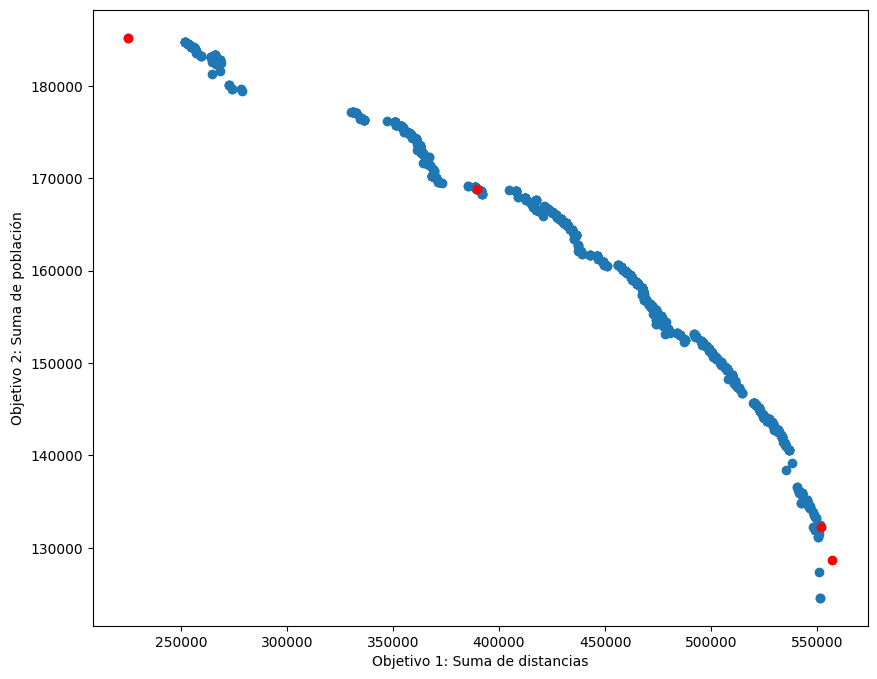

In [ ]:
plot_pareto(pareto_front,[best_mono_ind,max_suma_dist_ind,max_suma_pob_ind,intermedio_ind])